In [218]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
movieDataset = pd.read_csv('movie_statistic_dataset.csv')

In [219]:
# Load data into a DataFrame
df = pd.DataFrame(movieDataset, columns=movieDataset.columns)
df.head()
#Remove production_data column
df = df.drop([
    'genres', 'production_date', 'Domestic gross $','director_name', 'director_professions',
    'Production budget $', 'director_birthYear', 'director_deathYear',
    'movie_numerOfVotes'
    ], axis=1)

df.head()


,movie_title,runtime_minutes,movie_averageRating,approval_Index,Worldwide gross $
0,Avatar: The Way of Water,192.0,7.8,7.061101,2265935552
1,Avengers: Endgame,181.0,8.4,8.489533,2794731755
2,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,6.272064,1045713802
3,Avengers: Age of Ultron,141.0,7.3,7.214013,1395316979
4,Avengers: Infinity War,149.0,8.4,8.460958,2048359754


In [220]:
df

,movie_title,runtime_minutes,movie_averageRating,approval_Index,Worldwide gross $
0,Avatar: The Way of Water,192.0,7.8,7.061101,2265935552
1,Avengers: Endgame,181.0,8.4,8.489533,2794731755
2,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,6.272064,1045713802
3,Avengers: Age of Ultron,141.0,7.3,7.214013,1395316979
4,Avengers: Infinity War,149.0,8.4,8.460958,2048359754
...,...,...,...,...,...
4375,Super Size Me,100.0,7.2,6.017902,22233808
4376,The Brothers McMullen,98.0,6.6,4.231464,10426506
4377,Gabriela,93.0,4.9,2.526405,2335352
4378,Tiny Furniture,98.0,6.2,4.242085,424149


In [221]:
# Creating X and y
X = df[['runtime_minutes', 'approval_Index', 'Worldwide gross $']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df['movie_averageRating']
# Convert DataFrame into np array
y = np.asarray(y)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.50
)

In [223]:
scaler = StandardScaler()

In [224]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [225]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

model = keras.Sequential([
    keras.layers.Dense(32, activation='tanh', input_shape=(3,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(3)
])

In [226]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [227]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=25, validation_split=0.1)


Epoch 1/50


79/79 [==============================] - 3s 7ms/step - loss: 39.1151 - val_loss: 39.5837
Epoch 2/50
79/79 [==============================] - 0s 3ms/step - loss: 29.7921 - val_loss: 25.7523
Epoch 3/50
79/79 [==============================] - 0s 3ms/step - loss: 15.6731 - val_loss: 10.1599
Epoch 4/50
79/79 [==============================] - 0s 3ms/step - loss: 4.9627 - val_loss: 1.9507
Epoch 5/50
79/79 [==============================] - 0s 3ms/step - loss: 1.0823 - val_loss: 0.4939
Epoch 6/50
79/79 [==============================] - 0s 3ms/step - loss: 0.4229 - val_loss: 0.3620
Epoch 7/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3599 - val_loss: 0.2853
Epoch 8/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3580 - val_loss: 0.2783
Epoch 9/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3346 - val_loss: 0.2463
Epoch 10/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3413 - val_loss: 0.2905
Epoch 11/50
79/79 [=====

In [228]:
# Evaluar el modelo en el conjunto de prueba
mse = model.evaluate(X_test_scaled, y_test)
print(f'MSE en el conjunto de prueba: {mse}')

69/69 [==============================] - 0s 1ms/step - loss: 0.2507
MSE en el conjunto de prueba: 0.2507230043411255


In [229]:
train_mse = history.history['loss']
val_mse = history.history['val_loss']


In [230]:
epochs = np.arange(1, len(train_mse)+1)

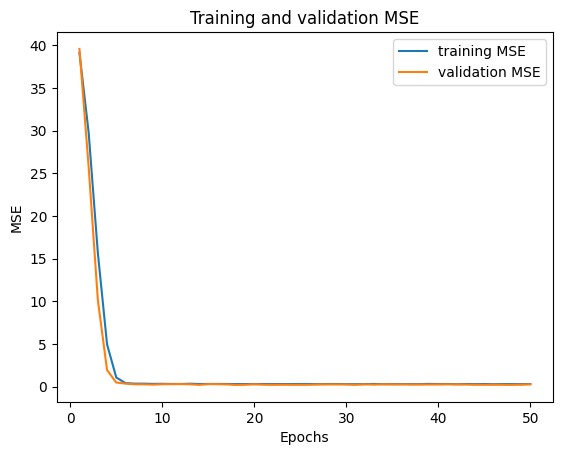

In [231]:
plt.plot(epochs, train_mse, label='training MSE')
plt.plot(epochs, val_mse, label='validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and validation MSE')
plt.legend()
plt.show()

In [232]:
# batched_model = Sequential([
#     Dense(64, input_shape=(4,), activation="relu"),
#     BatchNormalization(),
#     Dense(128, activation='relu'),
#     BatchNormalization(),
#     Dense(128, activation='relu'),
#     BatchNormalization(),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dense(3, activation='softmax')
# ]);

In [233]:
# batched_history =  batched_model.fit(
#     X_train, 
#     y_train, 
#     epochs=200, 
#     validation_split=0.25, 
#     batch_size=40, 
#     verbose=2
# )

In [234]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
# def plot_metric(history, metric):
#     train_metrics = history.history[metric]
#     val_metrics = history.history['val_'+metric]
#     epochs = range(1, len(train_metrics) + 1)
#     plt.plot(epochs, train_metrics)
#     plt.plot(epochs, val_metrics)
#     plt.title('Training and validation '+ metric)
#     plt.xlabel("Epochs")
#     plt.ylabel(metric)
#     plt.legend(["train_"+metric, 'val_'+metric])
#     plt.show()

In [235]:
# plot_metric(batched_history, 'mse')

In [236]:
# plot_metric(batched_history, 'loss')